In [ ]:
'''
Brendan Lauterborn
Data Mining Group Project-Carbon Emission
'''

import kagglehub
import pandas as pd
import os


# Download latest version
path = kagglehub.dataset_download("dumanmesut/individual-carbon-footprint-calculation")

print("Path to dataset files:", path)

csv_file_path = os.path.join(path, "Carbon Emission.csv")
emissions_df = pd.read_csv(csv_file_path)

emissions_df.head()

Using Colab cache for faster access to the 'individual-carbon-footprint-calculation' dataset.
Path to dataset files: /kaggle/input/individual-carbon-footprint-calculation


,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [ ]:
#Fill numerical nulls with average
#none to fill
emissions_df.isnull().sum()


,0
Body Type,0
Sex,0
Diet,0
How Often Shower,0
Heating Energy Source,0
Transport,0
Vehicle Type,6721
Social Activity,0
Monthly Grocery Bill,0
Frequency of Traveling by Air,0


In [ ]:
#fill nulls with None
emissions_df['Vehicle Type'].fillna('None', inplace=True)
emissions_df.isnull().sum()

/tmp/ipython-input-738252597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  emissions_df['Vehicle Type'].fillna('None', inplace=True)


,0
Body Type,0
Sex,0
Diet,0
How Often Shower,0
Heating Energy Source,0
Transport,0
Vehicle Type,0
Social Activity,0
Monthly Grocery Bill,0
Frequency of Traveling by Air,0


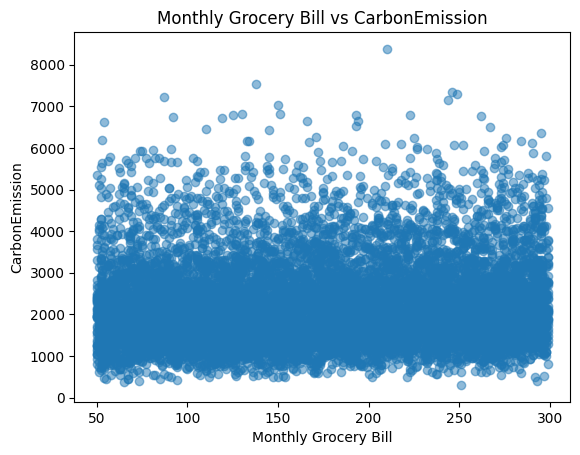

In [ ]:
#EDA section

#Numerical Variables
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=emissions_df, x='Monthly Grocery Bill', y='CarbonEmission', scatter_kws={'alpha':0.5})
plt.title('Monthly Grocery Bill vs CarbonEmission')
plt.show()

In [ ]:
from scipy.stats import pearsonr

r, p = pearsonr(emissions_df['Monthly Grocery Bill'], emissions_df['CarbonEmission'])
print(f"Correlation (r): {r:.3f}")
print(f"P-value: {p:.3f}")


Correlation (r): 0.082
P-value: 0.000


Statistically significant but weak in relation.

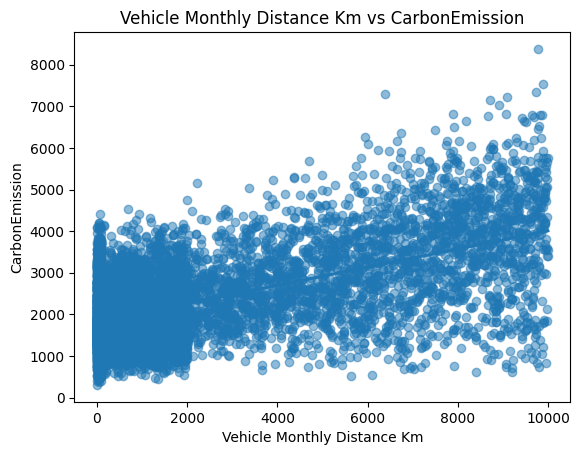

In [ ]:
sns.regplot(data=emissions_df, x='Vehicle Monthly Distance Km', y='CarbonEmission', scatter_kws={'alpha':0.5})
plt.title('Vehicle Monthly Distance Km vs CarbonEmission')
plt.show()

In [ ]:
r, p = pearsonr(emissions_df['Vehicle Monthly Distance Km'], emissions_df['CarbonEmission'])
print(f"Correlation (r): {r:.3f}")
print(f"P-value: {p:.3f}")


Correlation (r): 0.594
P-value: 0.000


Statistically significant and correlated

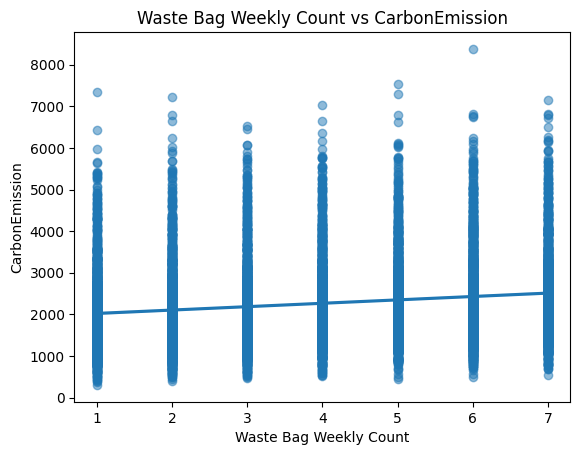

In [ ]:
sns.regplot(data=emissions_df, x='Waste Bag Weekly Count', y='CarbonEmission', scatter_kws={'alpha':0.5})
plt.title('Waste Bag Weekly Count vs CarbonEmission')
plt.show()

In [ ]:
r, p = pearsonr(emissions_df['Waste Bag Weekly Count'], emissions_df['CarbonEmission'])
print(f"Correlation (r): {r:.3f}")
print(f"P-value: {p:.3f}")


Correlation (r): 0.159
P-value: 0.000


Statistically significant but weak in relation.

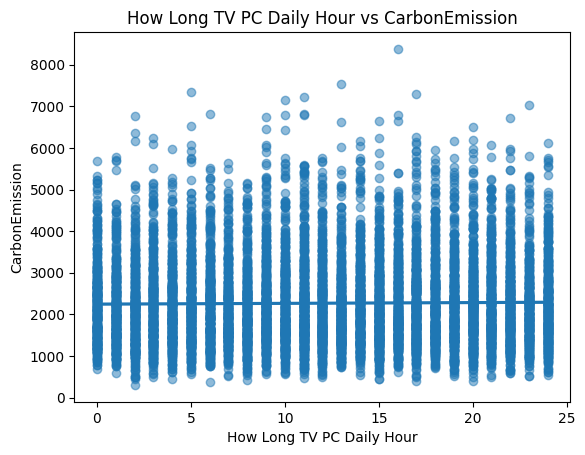

In [ ]:
sns.regplot(data=emissions_df, x='How Long TV PC Daily Hour', y='CarbonEmission', scatter_kws={'alpha':0.5})
plt.title('How Long TV PC Daily Hour vs CarbonEmission')
plt.show()

In [ ]:
r, p = pearsonr(emissions_df['How Long TV PC Daily Hour'], emissions_df['CarbonEmission'])
print(f"Correlation (r): {r:.3f}")
print(f"P-value: {p:.3f}")


Correlation (r): 0.013
P-value: 0.194


Not statistically significant.

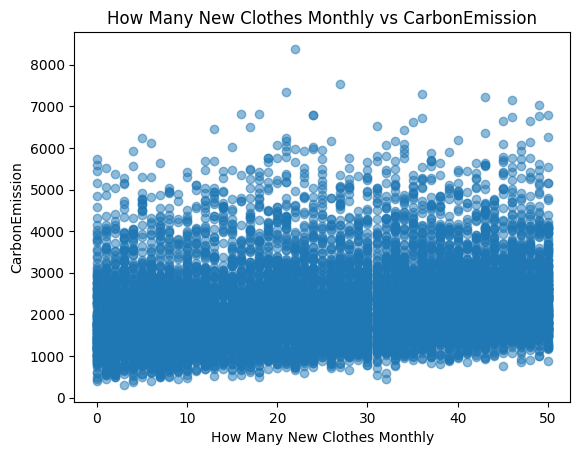

In [ ]:
sns.regplot(data=emissions_df, x='How Many New Clothes Monthly', y='CarbonEmission', scatter_kws={'alpha':0.5})
plt.title('How Many New Clothes Monthly vs CarbonEmission')
plt.show()

In [ ]:
r, p = pearsonr(emissions_df['How Many New Clothes Monthly'], emissions_df['CarbonEmission'])
print(f"Correlation (r): {r:.3f}")
print(f"P-value: {p:.3f}")


Correlation (r): 0.199
P-value: 0.000


Statistically significant but weak correlation.

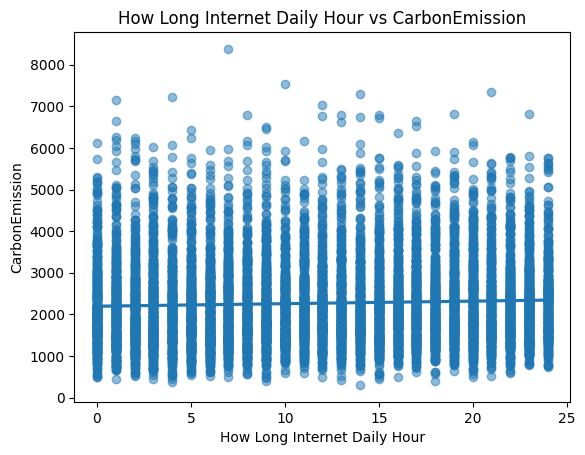

In [ ]:
sns.regplot(data=emissions_df, x='How Long Internet Daily Hour', y='CarbonEmission', scatter_kws={'alpha':0.5})
plt.title('How Long Internet Daily Hour vs CarbonEmission')
plt.show()

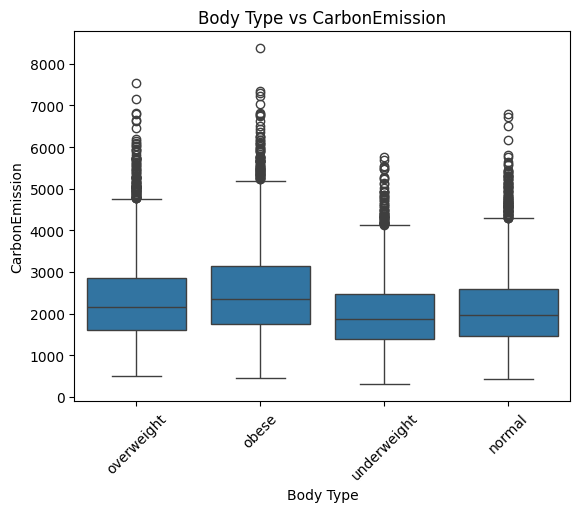

In [ ]:
#Categorical Variables
sns.boxplot(data=emissions_df, x='Body Type', y='CarbonEmission')
plt.title('Body Type vs CarbonEmission')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from scipy.stats import f_oneway

groups = [group['CarbonEmission'].values for name, group in emissions_df.groupby('Body Type')]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")


ANOVA F-statistic: 145.444, p-value: 0.000


This indicates statistical significance. At least one of the body types is statistically different in average emissions.

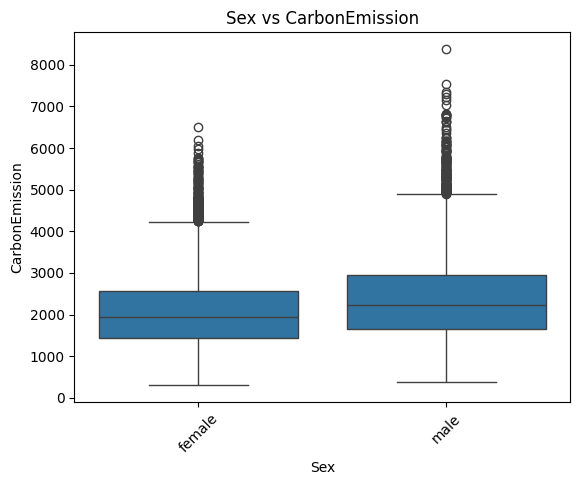

In [ ]:
sns.boxplot(data=emissions_df, x='Sex', y='CarbonEmission')
plt.title('Sex vs CarbonEmission')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from scipy.stats import ttest_ind

male = emissions_df[emissions_df['Sex'] == 'male']['CarbonEmission']
female = emissions_df[emissions_df['Sex'] == 'female']['CarbonEmission']

t_stat, p_value = ttest_ind(male, female, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

T-statistic: 16.609, p-value: 0.000


Sex has a statistically significant effect on Carbon Emissions.

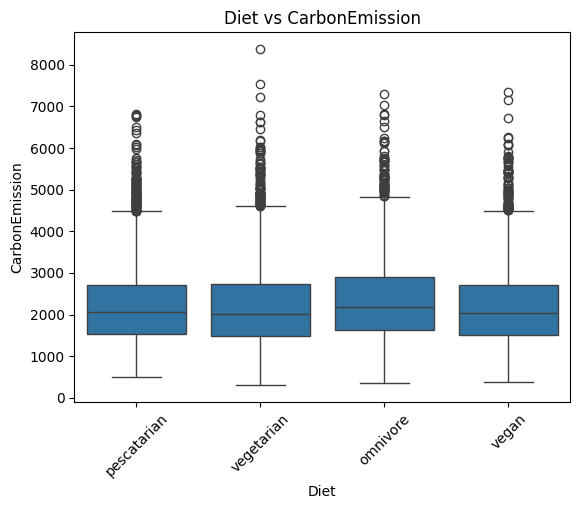

In [ ]:
sns.boxplot(data=emissions_df, x='Diet', y='CarbonEmission')
plt.title('Diet vs CarbonEmission')
plt.xticks(rotation=45)
plt.show()

In [ ]:
groups = [group['CarbonEmission'].values for name, group in emissions_df.groupby('Diet')]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")


ANOVA F-statistic: 16.884, p-value: 0.000


Diet has a statistically significant effect on Carbon Emissions.

In [ ]:
emissions_df.groupby('Diet')['CarbonEmission'].mean().sort_values()


,CarbonEmission
Diet,
vegan,2215.761314
vegetarian,2216.814408
pescatarian,2251.835552
omnivore,2391.980738


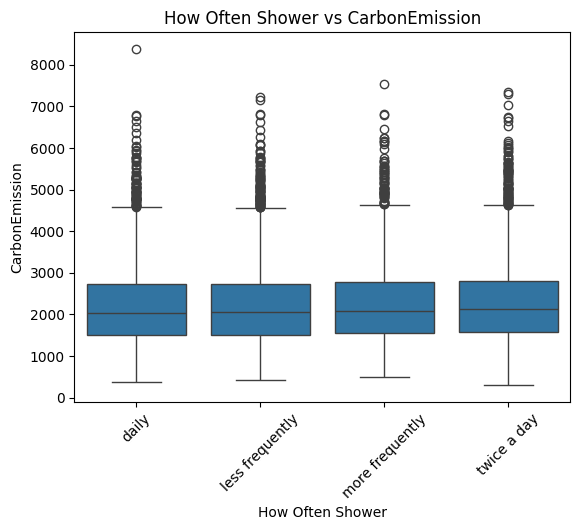

In [ ]:
sns.boxplot(data=emissions_df, x='How Often Shower', y='CarbonEmission')
plt.title('How Often Shower vs CarbonEmission')
plt.xticks(rotation=45)
plt.show()

In [ ]:
groups = [group['CarbonEmission'].values for name, group in emissions_df.groupby('How Often Shower')]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")


ANOVA F-statistic: 2.487, p-value: 0.059


No statistical difference.

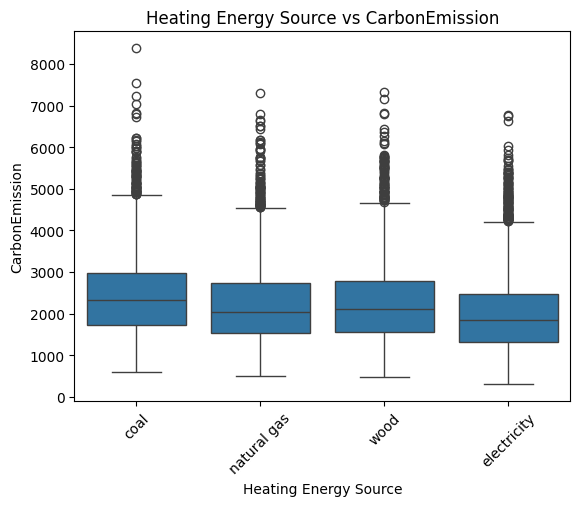

In [ ]:
sns.boxplot(data=emissions_df, x='Heating Energy Source', y='CarbonEmission')
plt.title('Heating Energy Source vs CarbonEmission')
plt.xticks(rotation=45)
plt.show()

In [ ]:
groups = [group['CarbonEmission'].values for name, group in emissions_df.groupby('Heating Energy Source')]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")


ANOVA F-statistic: 88.003, p-value: 0.000


Statistically significant.

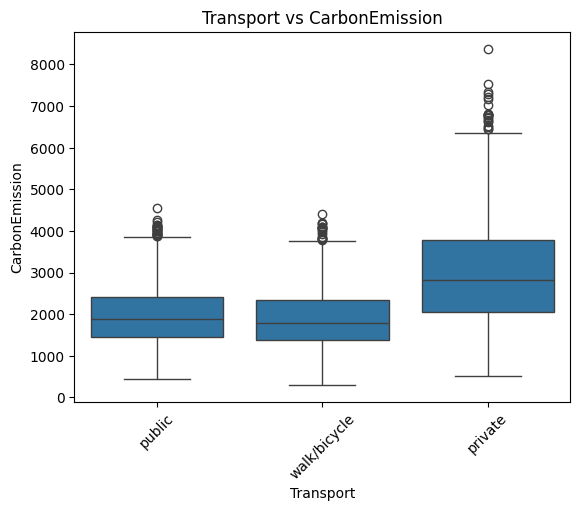

In [ ]:
sns.boxplot(data=emissions_df, x='Transport', y='CarbonEmission')
plt.title('Transport vs CarbonEmission')
plt.xticks(rotation=45)
plt.show()

In [ ]:
groups = [group['CarbonEmission'].values for name, group in emissions_df.groupby('Transport')]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")


ANOVA F-statistic: 1577.196, p-value: 0.000


Statistically significant.

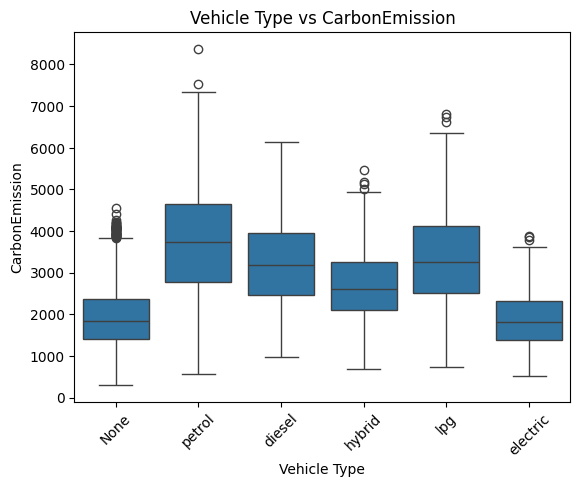

In [ ]:
sns.boxplot(data=emissions_df, x='Vehicle Type', y='CarbonEmission')
plt.title('Vehicle Type vs CarbonEmission')
plt.xticks(rotation=45)
plt.show()

In [ ]:
groups = [group['CarbonEmission'].values for name, group in emissions_df.groupby('Vehicle Type')]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")


ANOVA F-statistic: 1180.283, p-value: 0.000


Statistically significant.

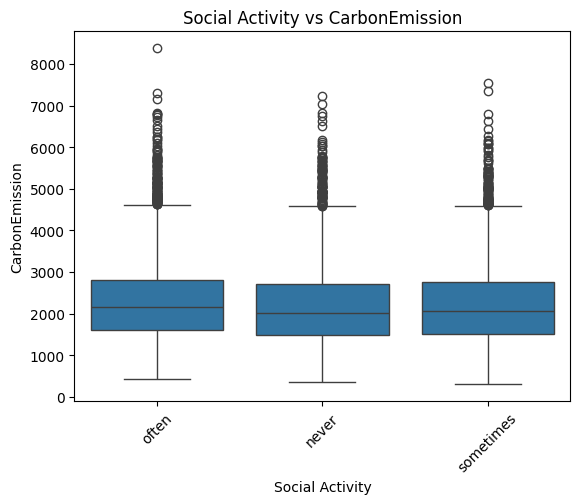

In [ ]:
sns.boxplot(data=emissions_df, x='Social Activity', y='CarbonEmission')
plt.title('Social Activity vs CarbonEmission')
plt.xticks(rotation=45)
plt.show()

In [ ]:
groups = [group['CarbonEmission'].values for name, group in emissions_df.groupby('Social Activity')]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")


ANOVA F-statistic: 16.137, p-value: 0.000


Statistically significant.

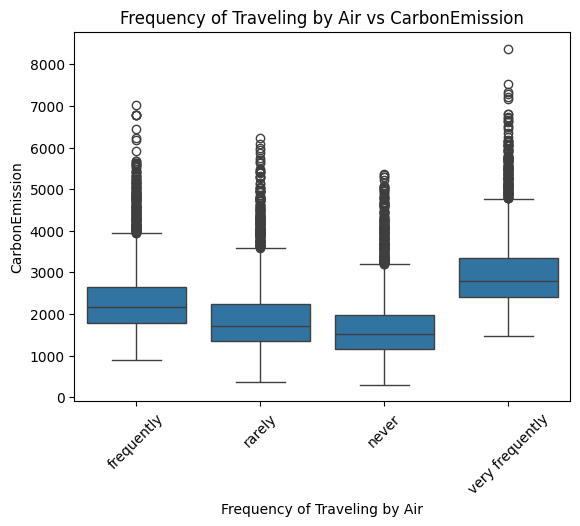

In [ ]:
sns.boxplot(data=emissions_df, x='Frequency of Traveling by Air', y='CarbonEmission')
plt.title('Frequency of Traveling by Air vs CarbonEmission')
plt.xticks(rotation=45)
plt.show()

In [ ]:
groups = [group['CarbonEmission'].values for name, group in emissions_df.groupby('Frequency of Traveling by Air')]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")


ANOVA F-statistic: 1054.378, p-value: 0.000


Statistically significant.

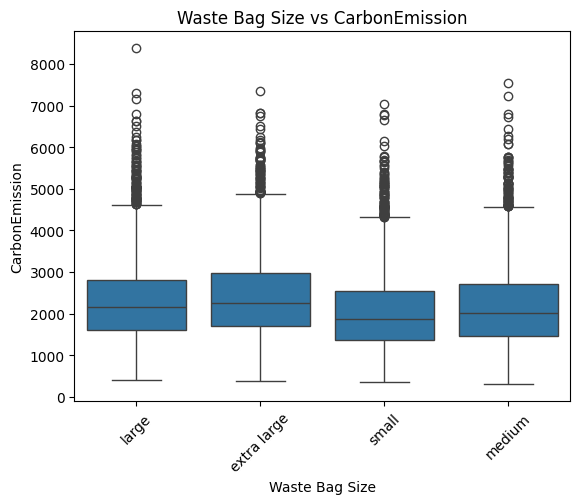

In [ ]:
sns.boxplot(data=emissions_df, x='Waste Bag Size', y='CarbonEmission')
plt.title('Waste Bag Size vs CarbonEmission')
plt.xticks(rotation=45)
plt.show()

In [ ]:
groups = [group['CarbonEmission'].values for name, group in emissions_df.groupby('Waste Bag Size')]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")


ANOVA F-statistic: 69.422, p-value: 0.000


Statistically significant.

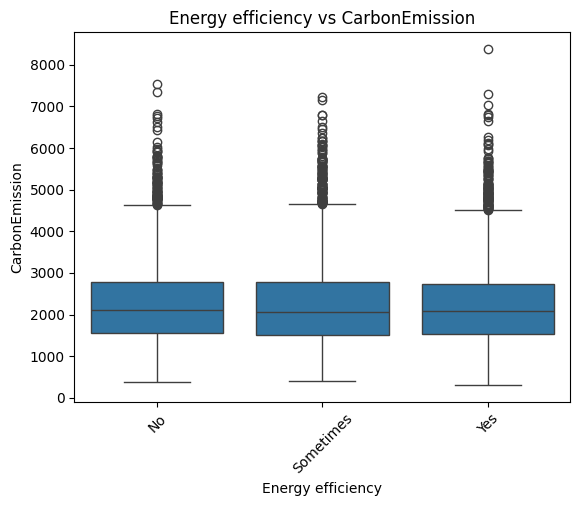

In [ ]:
sns.boxplot(data=emissions_df, x='Energy efficiency', y='CarbonEmission')
plt.title('Energy efficiency vs CarbonEmission')
plt.xticks(rotation=45)
plt.show()

In [ ]:
groups = [group['CarbonEmission'].values for name, group in emissions_df.groupby('Energy efficiency')]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")


ANOVA F-statistic: 0.940, p-value: 0.391


Not statistically significant.

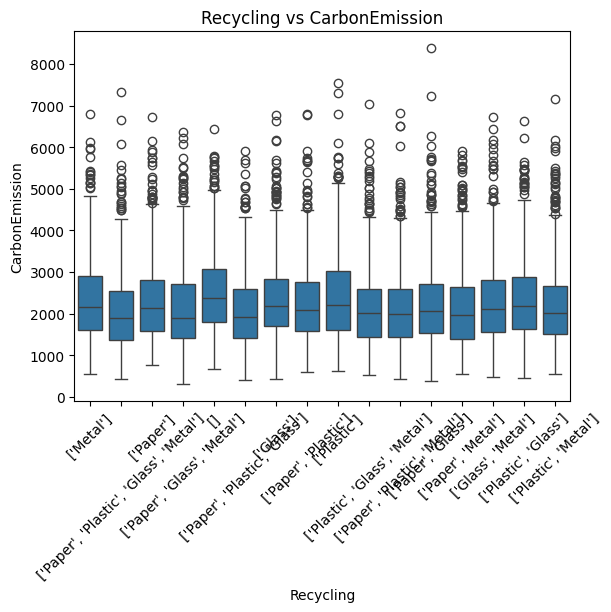

In [ ]:
sns.boxplot(data=emissions_df, x='Recycling', y='CarbonEmission')
plt.title('Recycling vs CarbonEmission')
plt.xticks(rotation=45)
plt.show()

In [ ]:
groups = [group['CarbonEmission'].values for name, group in emissions_df.groupby('Recycling')]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")


ANOVA F-statistic: 10.717, p-value: 0.000


Statistically significant.

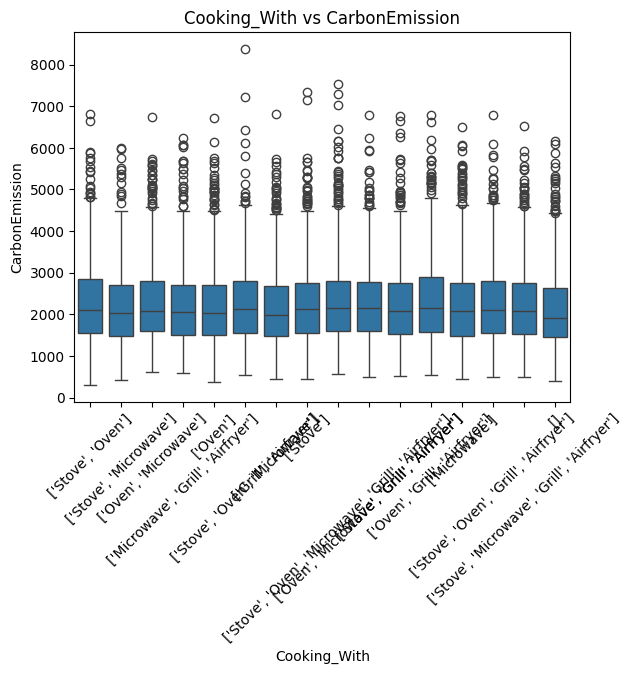

In [ ]:
sns.boxplot(data=emissions_df, x='Cooking_With', y='CarbonEmission')
plt.title('Cooking_With vs CarbonEmission')
plt.xticks(rotation=45)
plt.show()

In [ ]:
groups = [group['CarbonEmission'].values for name, group in emissions_df.groupby('Cooking_With')]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")


ANOVA F-statistic: 1.624, p-value: 0.060


Not statistically significant.

In [ ]:
#Summary statistics for numeric variables
emissions_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Monthly Grocery Bill,10000.0,173.8752,72.234018,50.0,111.0,173.0,237.00,299.0
Vehicle Monthly Distance Km,10000.0,2031.4859,2769.715597,0.0,69.0,823.0,2516.75,9999.0
Waste Bag Weekly Count,10000.0,4.0246,1.990375,1.0,2.0,4.0,6.00,7.0
How Long TV PC Daily Hour,10000.0,12.1392,7.106369,0.0,6.0,12.0,18.00,24.0
How Many New Clothes Monthly,10000.0,25.1090,14.698725,0.0,13.0,25.0,38.00,50.0
How Long Internet Daily Hour,10000.0,11.8891,7.277218,0.0,6.0,12.0,18.00,24.0
CarbonEmission,10000.0,2269.1473,1017.675247,306.0,1538.0,2080.0,2768.00,8377.0


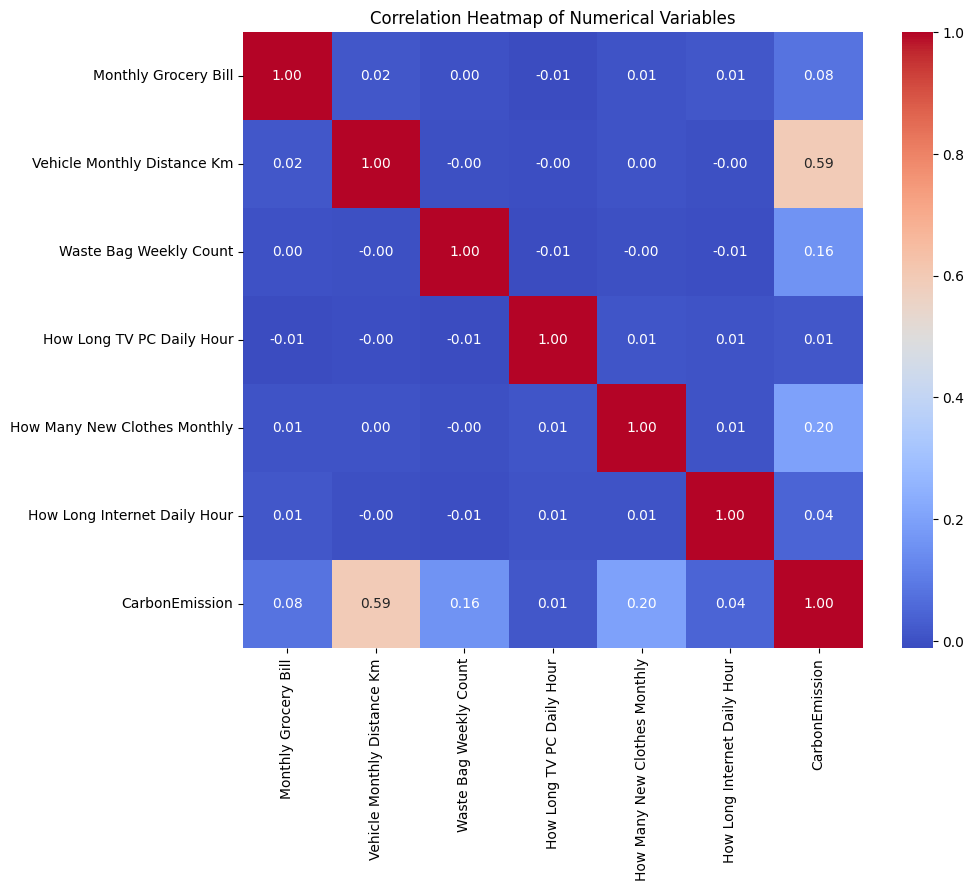

In [ ]:
plt.figure(figsize=(10, 8))

# Only include numeric columns
corr_matrix = emissions_df.select_dtypes(include=['number']).corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


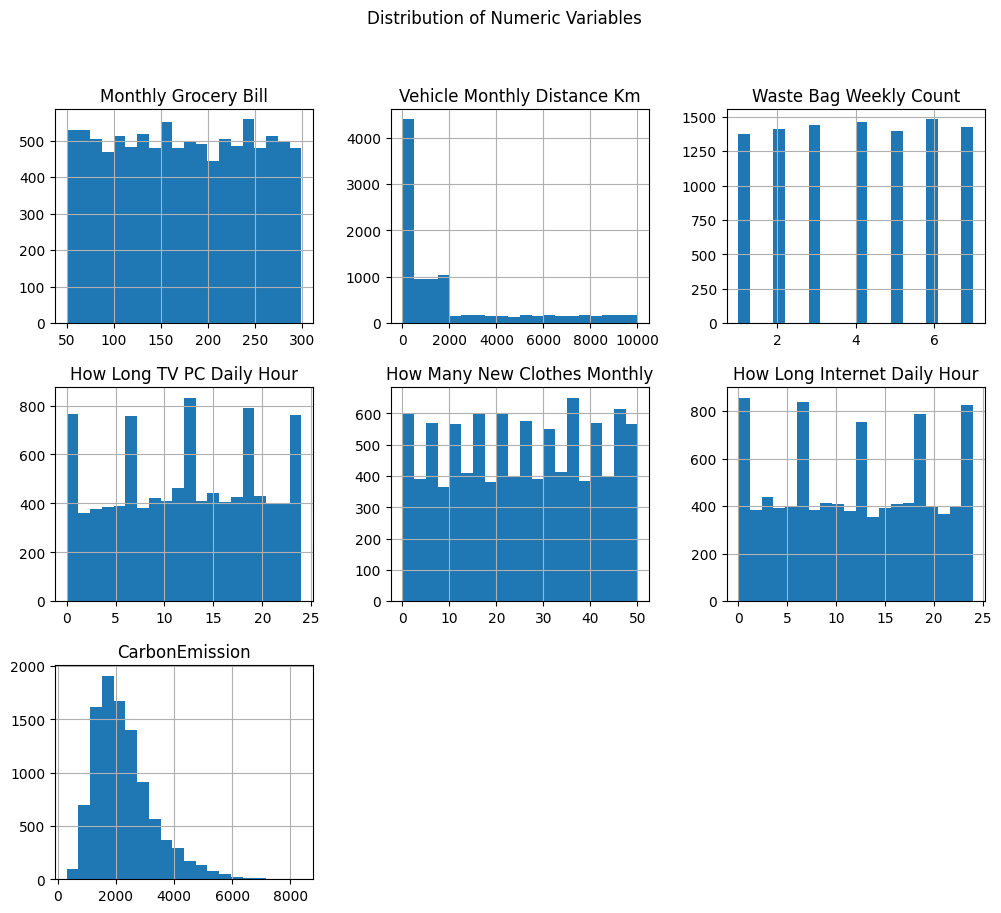

In [ ]:
emissions_df.hist(figsize=(12,10), bins=20)
plt.suptitle('Distribution of Numeric Variables')
plt.show()


In [ ]:
emissions_df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,None,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,None,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,None,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [ ]:
'''Data Preprocessing section
Encoding
Body Type	-> Categorical -> ordinal
Sex	-> Categorical -> Binary
Diet -> Categorical -> one hot
How Often Shower	-> categorical -> ordinal
Heating Energy Source	-> categorical -> one hot
Transport	-> categorical -> one hot
Vehicle Type	-> categorical -> one hot
Social Activity	-> categorical -> ordinal
Monthly Grocery Bill	-> numerical -> scale
Frequency of Traveling by Air	-> categorical -> ordinal
Vehicle Monthly Distance Km	-> numerical -> scale
Waste Bag Size	-> categorical -> ordinal
Waste Bag Weekly Count	-> numerical -> scale
How Long TV PC Daily Hour	-> numerical -> scale
How Many New Clothes Monthly	-> numerical -> scale
How Long Internet Daily Hour -> numerical -> scale
Energy efficiency	-> categorical ->ordinal
Recycling	-> categorical -> multi hot
Cooking_With -> categorical -> multi hot
CarbonEmission (dep var)
'''

import ast
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler

temp_df = emissions_df.copy()


#ordinal
ordinal_maps = {
    'Body Type': {'underweight':0, 'normal':1, 'overweight':2, 'obese':3},
    'How Often Shower': {'less frequently':0, 'daily':1, 'more frequently':2, 'twice a day':3},
    'Social Activity': {'never':0, 'sometimes':1, 'often':2},
    'Frequency of Traveling by Air': {'never':0, 'rarely':1, 'frequently':2, 'very frequently':3},
    'Waste Bag Size': {'small':0, 'medium':1, 'large':2, 'extra large':3},
    'Energy efficiency': {'No':0, 'Sometimes':1, 'Yes': 2},  # binary but conceptually ordinal
}

for col, mapping in ordinal_maps.items():
    if col in temp_df.columns:
        temp_df[col] = temp_df[col].map(mapping)
#binary
if 'Sex' in temp_df.columns:
    temp_df['Sex'] = temp_df['Sex'].map({'female':0, 'male':1})


#one hot
one_hot_cols = ['Diet', 'Heating Energy Source', 'Transport', 'Vehicle Type']
one_hot_cols = [c for c in one_hot_cols if c in temp_df.columns]
temp_df = pd.get_dummies(temp_df, columns=one_hot_cols, drop_first=True, dtype=int)

#multi hot

for col in ['Recycling', 'Cooking_With']:
    if col not in temp_df.columns:
        continue

    # clean strings -> list
    def to_list_safe(x):
        if pd.isna(x):
            return []
        if isinstance(x, list):
            return x
        if isinstance(x, str):
            try:
                val = ast.literal_eval(x)
                if isinstance(val, list):
                    return val
                else:
                    return [val]
            except Exception:
                return [s.strip() for s in x.split(',') if s.strip()]
        return []

    temp_df[col] = temp_df[col].apply(to_list_safe)

    mlb = MultiLabelBinarizer()
    expanded = mlb.fit_transform(temp_df[col])
    expanded_df = pd.DataFrame(expanded, columns=[f"{col}_{c}" for c in mlb.classes_], index=temp_df.index)

    temp_df = pd.concat([temp_df.drop(columns=[col]), expanded_df], axis=1)

#z-score scaling for numerical values
scaler = StandardScaler()

numeric_cols = [
    'Monthly Grocery Bill', 'Vehicle Monthly Distance Km',
    'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
    'How Many New Clothes Monthly', 'How Long Internet Daily Hour'
]

temp_df[numeric_cols] = scaler.fit_transform(temp_df[numeric_cols])

temp_df[numeric_cols].describe()


print(len(temp_df.columns), "columns")
print(temp_df.columns[:])
temp_df.head()

36 columns
Index(['Body Type', 'Sex', 'How Often Shower', 'Social Activity',
       'Monthly Grocery Bill', 'Frequency of Traveling by Air',
       'Vehicle Monthly Distance Km', 'Waste Bag Size',
       'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'CarbonEmission', 'Diet_pescatarian', 'Diet_vegan',
       'Diet_vegetarian', 'Heating Energy Source_electricity',
       'Heating Energy Source_natural gas', 'Heating Energy Source_wood',
       'Transport_public', 'Transport_walk/bicycle', 'Vehicle Type_diesel',
       'Vehicle Type_electric', 'Vehicle Type_hybrid', 'Vehicle Type_lpg',
       'Vehicle Type_petrol', 'Recycling_Glass', 'Recycling_Metal',
       'Recycling_Paper', 'Recycling_Plastic', 'Cooking_With_Airfryer',
       'Cooking_With_Grill', 'Cooking_With_Microwave', 'Cooking_With_Oven',
       'Cooking_With_Stove'],
      dtype='object')


,Body Type,Sex,How Often Shower,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,...,Vehicle Type_petrol,Recycling_Glass,Recycling_Metal,Recycling_Paper,Recycling_Plastic,Cooking_With_Airfryer,Cooking_With_Grill,Cooking_With_Microwave,Cooking_With_Oven,Cooking_With_Stove
0,2,0,1,2,0.777025,2,-0.657677,2,-0.012360,-0.723218,...,0,0,1,0,0,0,0,0,1,1
1,3,0,0,2,-0.828947,1,-0.730251,3,-0.514803,-0.441767,...,0,0,1,0,0,0,0,1,0,1
2,2,1,2,0,-0.496677,0,0.159055,0,-1.519689,0.261863,...,1,0,1,0,0,0,0,1,1,0
3,2,1,3,1,-0.233630,1,-0.706782,1,-0.514803,1.106218,...,0,1,1,1,1,1,1,1,0,0
4,3,0,1,2,1.275430,3,2.320034,2,-1.519689,-1.286122,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# 1) Booleans to ints (sometimes dummies come out bool)
bool_cols = temp_df.select_dtypes(include='bool').columns
temp_df[bool_cols] = temp_df[bool_cols].astype(int)

# 2) Confirm all features (except target) are numeric
non_numeric = temp_df.drop(columns=['CarbonEmission']).select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric feature columns (should be empty):", non_numeric)

# 3) Confirm no missing values anywhere
print("Total NaNs:", int(temp_df.isna().sum().sum()))

# 4) Quick peek at multi-hot columns to ensure binary
print(temp_df[['Recycling_Glass','Recycling_Metal','Recycling_Paper','Recycling_Plastic',
               'Cooking_With_Airfryer','Cooking_With_Grill','Cooking_With_Microwave',
               'Cooking_With_Oven','Cooking_With_Stove']].sum())


Non-numeric feature columns (should be empty): []
Total NaNs: 0
Recycling_Glass           4979
Recycling_Metal           5047
Recycling_Paper           4977
Recycling_Plastic         4997
Cooking_With_Airfryer     4992
Cooking_With_Grill        4992
Cooking_With_Microwave    5073
Cooking_With_Oven         5050
Cooking_With_Stove        5041
dtype: int64


In [ ]:
#Linear Regression model (baseline)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X = temp_df.drop(columns=['CarbonEmission'])
y = temp_df['CarbonEmission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R^2 Score: 0.9214
RMSE: 285.8688


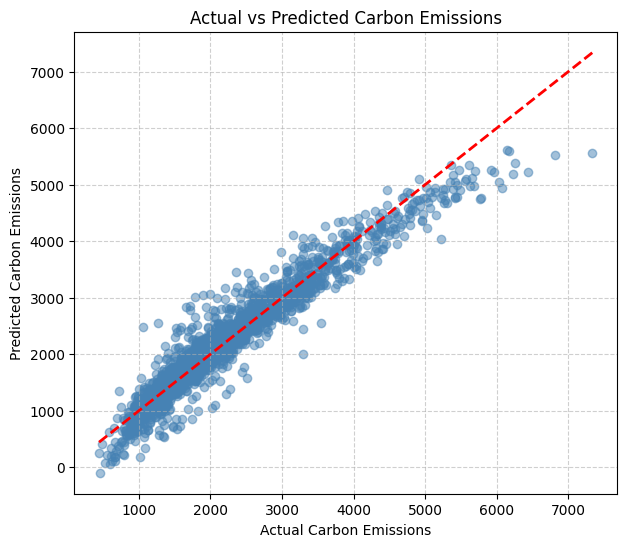

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha =.5, color = 'steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Carbon Emissions')
plt.ylabel('Predicted Carbon Emissions')
plt.title('Actual vs Predicted Carbon Emissions')
plt.grid(True, linestyle='--', alpha=.6)
plt.show()


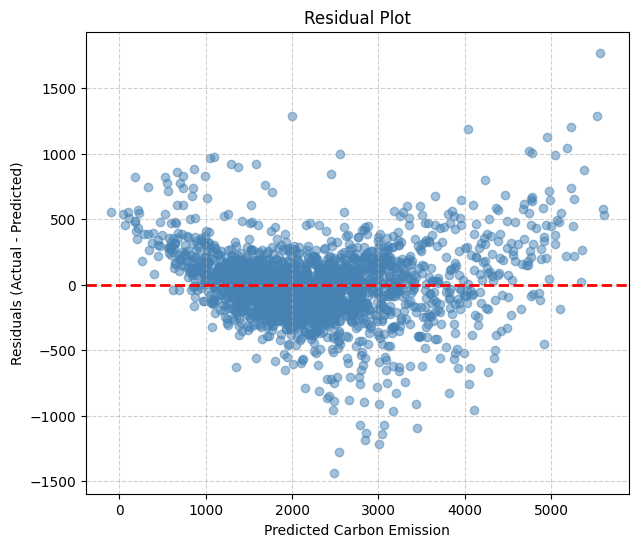

In [ ]:
# Compute residuals
residuals = y_test - y_pred

plt.figure(figsize=(7,6))
plt.scatter(y_pred, residuals, alpha=0.5, color='steelblue')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Carbon Emission')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


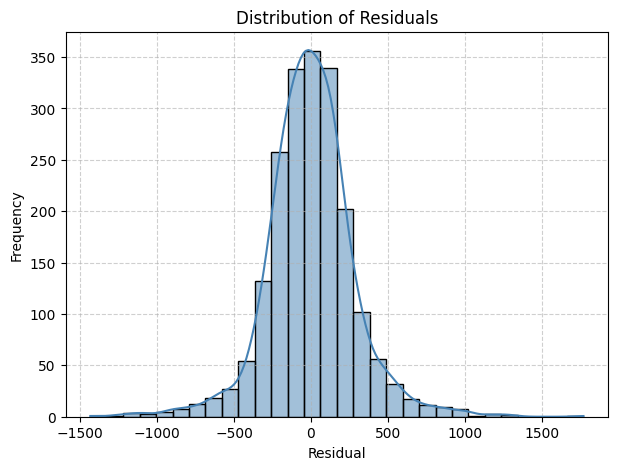

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, color='steelblue', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()